# A Gene Ontology Tutorial in Python - Model Solutions to Exercises

These electronic exercises (with solutions) accompany the book chapter "A Gene Ontology Tutorial in Python" by Alex Warwick Vesztrocy and Christophe Dessimoz, to appear in _The Gene Ontology Handbook_, C Dessimoz and N Skunca Eds, Springer Humana.

Version: 1.0.1 (Sep 2016)

## Section 2 - Querying the Gene Ontology

First, we need to load the GOATools library. This enables us to parse the Gene Ontology (GO) OBO file. For more information on GOATools, see <a href="https://github.com/tanghaibao/goatools">their documentation</a>.

In [1]:
# Import the OBO parser from GOATools
from goatools import obo_parser

In order to download the GO OBO file, we also require the <code>wget</code> and <code>os</code> libraries.

In [2]:
import wget
import os

Now, we can download the OBO file into the <code>'./data'</code> folder using the following. We are going to download the <code>go-basic.obo</code> version of the ontology, which is guaranteed to be acyclic, which means that annotations can be propagated up the graph.

In [3]:
go_obo_url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
data_folder = os.getcwd() + '/data'

# Check if we have the ./data directory already
if(not os.path.isfile(data_folder)):
    # Emulate mkdir -p (no error if folder exists)
    try:
        os.mkdir(data_folder)
    except OSError as e:
        if(e.errno != 17):
            raise e
else:
    raise Exception('Data path (' + data_folder + ') exists as a file. '
                   'Please rename, remove or change the desired location of the data path.')

# Check if the file exists already
if(not os.path.isfile(data_folder+'/go-basic.obo')):
    go_obo = wget.download(go_obo_url, data_folder+'/go-basic.obo')
else:
    go_obo = data_folder+'/go-basic.obo'

The path to the GO OBO file is now stored in the variable <code>go_obo</code>.

In [4]:
print(go_obo)

/Users/alex/Shared/labgits/go-handbook-live/data/go-basic.obo


Now we can create a dictionary of the GO terms, using the <code>obo_parser</code> from GOATools.

In [5]:
go = obo_parser.GODag(go_obo)

load obo file /Users/alex/Shared/labgits/go-handbook-live/data/go-basic.obo


/Users/alex/Shared/labgits/go-handbook-live/data/go-basic.obo: format-version(1.2) data-version(releases/2016-09-20)


47239 nodes imported


### Exercises 2.1
#### Question 2.1.a. 
What is the name of the GO term <code>GO:00048527</code>?

#### Answer 2.1.a.

In [6]:
go_id = 'GO:0048527'
go_term = go[go_id]
print(go_term)

GO:0048527	level-05	depth-06	lateral root development [biological_process] 


In [7]:
print('GO term name: {}'.format(go_term.name))
print('GO term namespace: {}'.format(go_term.namespace))

GO term name: lateral root development
GO term namespace: biological_process


#### Question 2.1.b. 
What are the immediate parent(s) of the term <code>GO:00048527</code>?

#### Answer 2.1.b.

In [8]:
for term in go_term.parents:
    print(term)

GO:0048528	level-04	depth-05	post-embryonic root development [biological_process] 


#### Question 2.1.c. 
What are the immediate children of the term <code>GO:00048527</code>?

#### Answer 2.1.c.

In [9]:
for term in go_term.children:
    print(term)

#### Question 2.1.d. 
Recursively find all the parent and child terms of the term <code>GO:00048527</code>. _Hint_: use your solutions to the previous two questions, with a recursive loop.

#### Answer 2.1.d.

First, we can define functions to find the parents and children of a GO term, as well as one that finds both - the transitive closure.

In [10]:
def transitive_closure(go_term, go):
    go_term_set = set()
    find_parents(go_term, go, go_term_set)
    find_children(go_term, go, go_term_set)
    return go_term_set
    
def find_parents(term1, go, go_term_set={}, ret=False):
    for term2 in term1.parents:
        go_term_set.update({term2})
        
        # Recurse on term to find all parents
        find_parents(term2, go, go_term_set)          
    if(ret):
        return go_term_set

def find_children(term1, go, go_term_set={}, ret=False):
    for term2 in term1.children:
        go_term_set.update({term2})
        
        # Recurse on term to find all children
        find_children(term2, go, go_term_set)
    if(ret):
        return go_term_set

Now we can create the transitive closure as a set by calling the following.

In [11]:
go_term_set = transitive_closure(go_term, go)

We can now print this out using the "pretty print"f eature that is inherited from GOATools.

In [12]:
for term in go_term_set:
    print(term)

GO:0090696	level-03	depth-04	post-embryonic plant organ development [biological_process] 
GO:0044707	level-02	depth-02	single-multicellular organism process [biological_process] 
GO:0009791	level-03	depth-03	post-embryonic development [biological_process] 
GO:0044699	level-01	depth-01	single-organism process [biological_process] 
GO:0048364	level-03	depth-04	root development [biological_process] 
GO:0099402	level-03	depth-03	plant organ development [biological_process] 
GO:0048528	level-04	depth-05	post-embryonic root development [biological_process] 
GO:0032502	level-01	depth-01	developmental process [biological_process] 
GO:0044767	level-02	depth-02	single-organism developmental process [biological_process] 
GO:0032501	level-01	depth-01	multicellular organismal process [biological_process] 
GO:0048856	level-02	depth-02	anatomical structure development [biological_process] 
GO:0008150	level-00	depth-00	biological_process [biological_process] 


An alternative method is by using an inbuilt function of GOATools.

In [13]:
rec = go[go_id]
parents = rec.get_all_parents()
children = rec.get_all_children()

In [14]:
for term in parents.union(children):
    print(go[term])

GO:0032502	level-01	depth-01	developmental process [biological_process] 
GO:0044767	level-02	depth-02	single-organism developmental process [biological_process] 
GO:0032501	level-01	depth-01	multicellular organismal process [biological_process] 
GO:0044707	level-02	depth-02	single-multicellular organism process [biological_process] 
GO:0048856	level-02	depth-02	anatomical structure development [biological_process] 
GO:0099402	level-03	depth-03	plant organ development [biological_process] 
GO:0009791	level-03	depth-03	post-embryonic development [biological_process] 
GO:0048364	level-03	depth-04	root development [biological_process] 
GO:0008150	level-00	depth-00	biological_process [biological_process] 
GO:0048528	level-04	depth-05	post-embryonic root development [biological_process] 
GO:0090696	level-03	depth-04	post-embryonic plant organ development [biological_process] 
GO:0044699	level-01	depth-01	single-organism process [biological_process] 


#### Question 2.1.e. 
How many GO terms have the word “growth” in their name?

#### Answer 2.1.e.

To do this, we can loop around every single GO term and check their name.

In [15]:
growth_count = 0
for go_term in go.values():
    if 'growth' in go_term.name:
        growth_count += 1
        
print('Number of GO terms with "growth" in their name: {}'.format(growth_count))

Number of GO terms with "growth" in their name: 671


#### Question 2.1.f.
What is the deepest common ancestor term of <code>GO:0048527</code> and <code>GO:0097178</code>?

#### Answer 2.1.f.

First, we can write a function that finds the common GO terms.

In [16]:
def common_parent_go_ids(terms, go):
    '''
        This function finds the common ancestors in the GO 
        tree of the list of terms in the input.
    '''
    # Find candidates from first
    rec = go[terms[0]]
    candidates = rec.get_all_parents()
    candidates.update({terms[0]})
    
    # Find intersection with second to nth term
    for term in terms[1:]:
        rec = go[term]
        parents = rec.get_all_parents()
        parents.update({term})
        
        # Find the intersection with the candidates, and update.
        candidates.intersection_update(parents)
        
    return candidates

Then we can define the deepest common ancestor of two terms, as follows:

In [17]:
def deepest_common_ancestor(terms, go):
    '''
        This function gets the nearest common ancestor 
        using the above function.
        Only returns single most specific - assumes unique exists.
    '''
    # Take the element at maximum depth. 
    return max(common_parent_go_ids(terms, go), key=lambda t: go[t].depth)

Then we can find the deepest common ancestor of the two terms in question. 

In [18]:
go_id1 = 'GO:0097178'
go_id_id1_dca = deepest_common_ancestor([go_id, go_id1], go)

In [19]:
print('The nearest common ancestor of\n\t{} ({})\nand\n\t{} ({})\nis\n\t{} ({})'
      .format(go_id, go[go_id].name, 
              go_id1, go[go_id1].name,
              go_id_id1_dca, go[go_id_id1_dca].name))

The nearest common ancestor of
	GO:0048527 (lateral root development)
and
	GO:0097178 (ruffle assembly)
is
	GO:0044699 (single-organism process)


### Exercises 2.2
Using the visualisation function in GOATools, answer the following questions.

#### Question 2.2.a. 
Produce a figure similar to that in Figure 1 of the chapter, for the GO term <code>GO:0097190</code>. From the visualisation, what is the name of this term?

#### Answer 2.2.a

We first have to create the query to return the record for the GO term <code>GO:0097190</code>.

In [20]:
go_id2 = 'GO:0097192'
rec = go[go_id2]

We then need to decide where to save the image file.

In [21]:
lineage_png = go_id2 + '-lineage.png'

Then we can draw the lineage, as so (you may need to install the pygraphviz library via pip if needed):

In [22]:
go.draw_lineage([rec], lineage_img=lineage_png)

lineage info for terms ['GO:0097192'] written to GO:0097192-lineage.png


*Note*, the GOATools <code>draw_lineage</code> function will output a PNG to <code>./GO_lineage.png</code>, or whatever is defined by the argument <code>lineage_img</code>. This can be viewed with your system viewer, or included here by running something similar to the following code. It may be necessary to double click on the image and scroll, in order to see the detail.

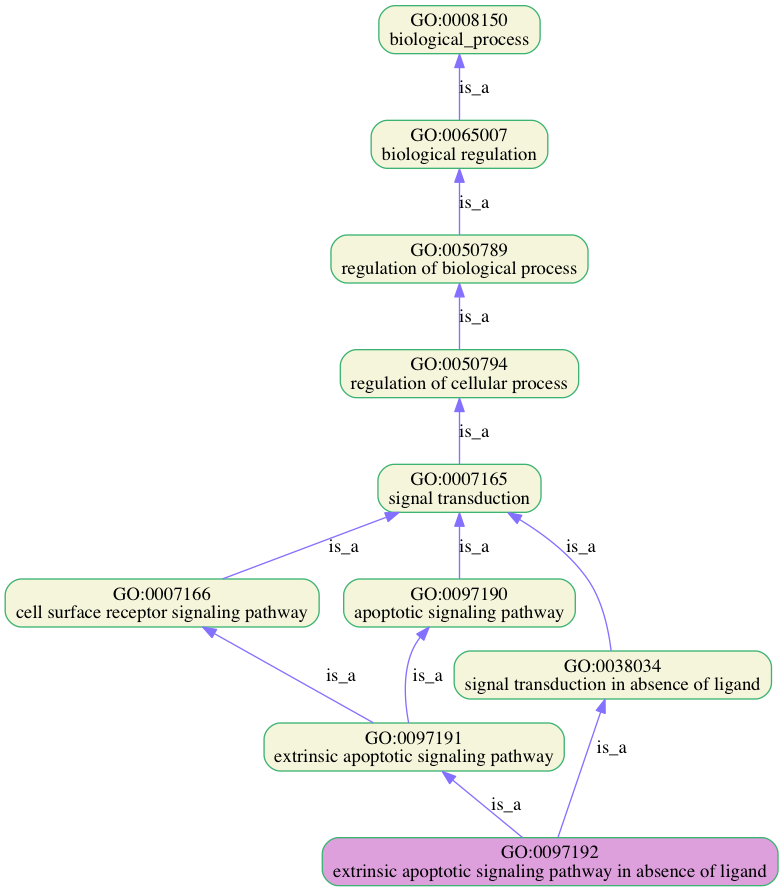

In [23]:
from IPython.display import Image
Image(lineage_png)

#### Question 2.2.b.
Using this figure, what is the most specific term that is in the parent terms of both <code>GO:0097191</code> and <code>GO:0038034</code>? This is also referred to as the lowest common ancestor.

#### Answer 2.2.b.

This is possible to read off the graph - the term <code>GO:0007165</code>, _signal transduction_.

### Exercises 2.3
Using the <code>get_oboxml()</code> function (you may need to install the package xmltodict using pip), listed in the chapter in Source Code 2.1, answer the following questions.

In [24]:
from future.standard_library import install_aliases
install_aliases()
from urllib.request import urlopen
import xmltodict

def get_oboxml(go_id):
    """
        This function retrieves the OBO-XML for a given Gene Ontology term,
        using EMBL-EBI's QuickGO browser.
        Input: go_id - a valid Gene Ontology ID, e.g. GO:0048527.
    """
    quickgo_url = "http://www.ebi.ac.uk/QuickGO/GTerm?id="+go_id+"&format=oboxml"
    oboxml = urlopen(quickgo_url)
    
    # Check the response
    if(oboxml.getcode() == 200):
        obodict = xmltodict.parse(oboxml.read())
        return obodict
    else:
        raise ValueError("Couldn't receive OBOXML from QuickGO. Check GO ID and try again.")

#### Question 2.3.a. 
Find the name and description of the GO term <code>GO:0048527</code>. _Hint_: print out the dictionary returned by the function and study its structure.


#### Answer 2.3.a.
First, let's get the OBO-XML.

In [25]:
obo_dict = get_oboxml(go_id)

It might be useful to study the structure of this dictionary, in order to answer this question.

In [26]:
print(obo_dict)

OrderedDict([(u'obo', OrderedDict([(u'header', OrderedDict([(u'format-version', u'1.2'), (u'auto-generated-by', u'QuickGO: http://www.ebi.ac.uk/QuickGO'), (u'synonymtypedef', OrderedDict([(u'id', u'systematic_synonym'), (u'name', u'Systematic synonym'), (u'scope', u'EXACT')])), (u'default-namespace', u'gene_ontology'), (u'remark', u'This is not the master copy of the OBO files, see http://www.geneontology.org/GO.downloads.ontology.shtml')])), (u'term', OrderedDict([(u'id', u'GO:0048527'), (u'name', u'lateral root development'), (u'namespace', u'biological_process'), (u'def', OrderedDict([(u'defstr', u'The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper.')])), (u'is_a', u'GO:0048528')]))]))])


It might be easier to visualise a complex structure, such as this dictionary. This can be done by plotting the keys, using the <code>visualisedictionary</code> library (which you may need to install).

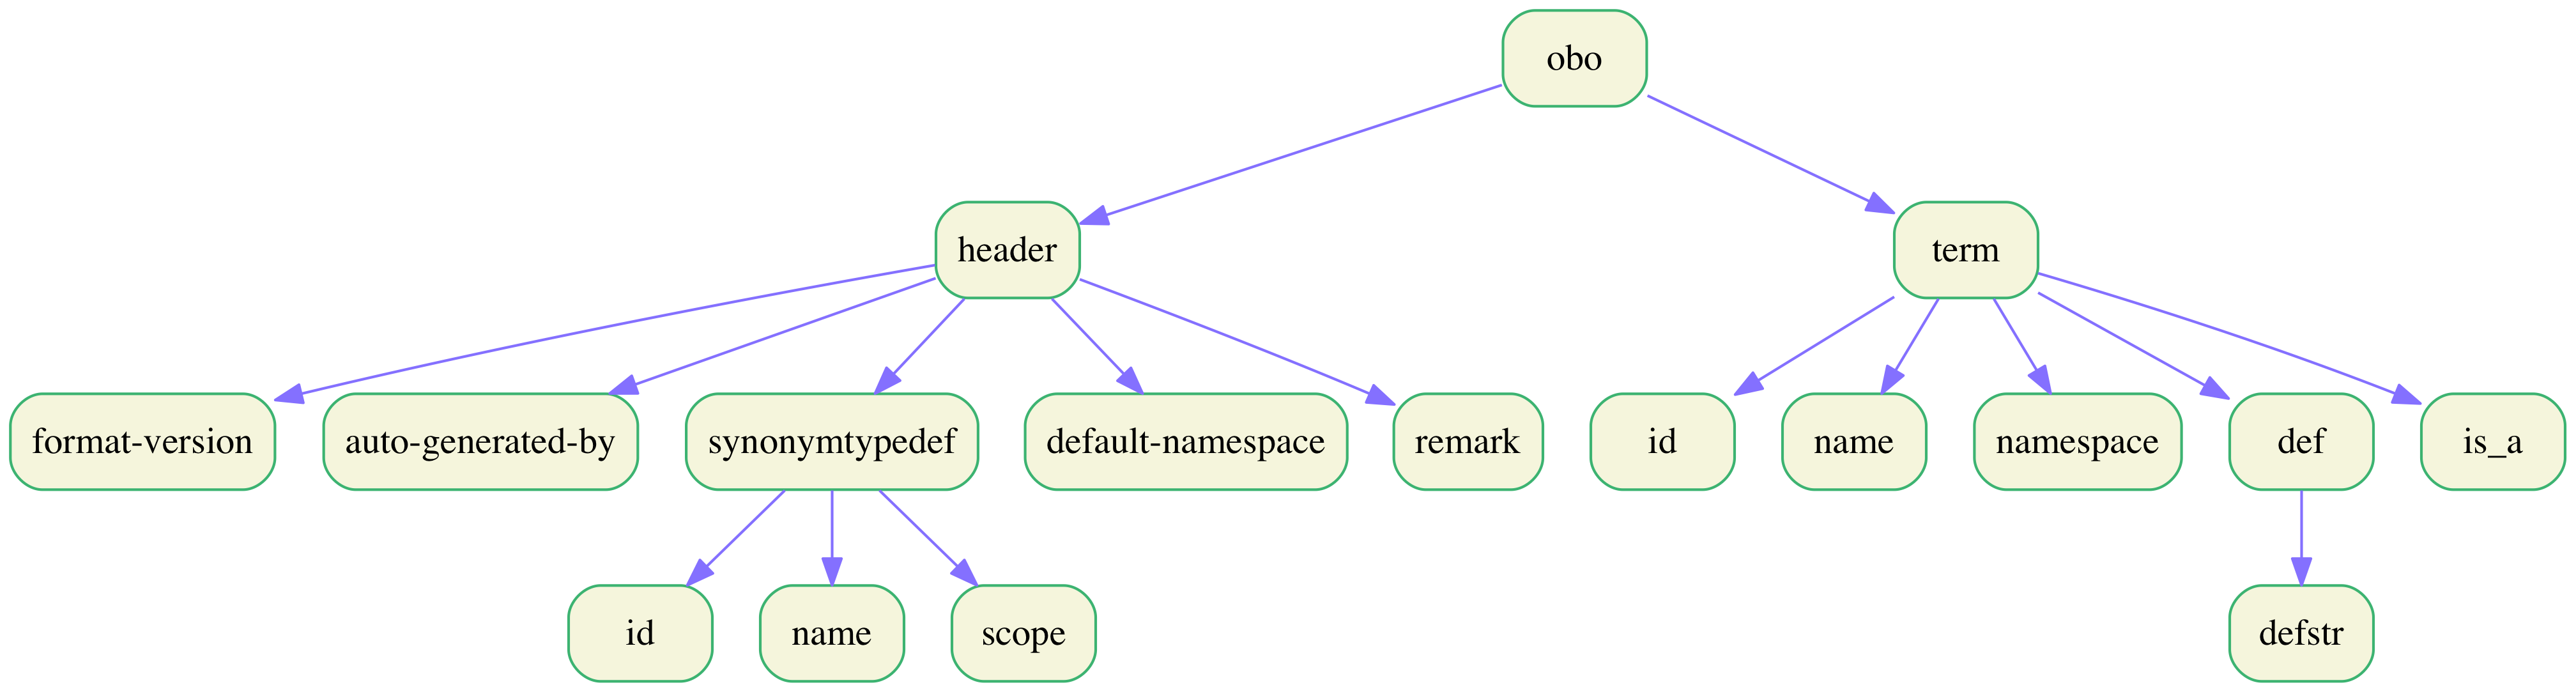

In [27]:
import visualisedictionary as vd

# Create pygraphviz graph with visualisedictionary.KeysGraph()
G = vd.KeysGraph(obo_dict)
# Draw and save this.
vd_filename = './OBOXML-Dictionary-' + go_id + '.png'
G.draw(vd_filename)

# Draw this image here.
Image(vd_filename)

Now we can extract the relevant data.

In [28]:
print('Description of {} is:\n\t{}'.format(go_id, obo_dict['obo']['term']['def']['defstr']))

Description of GO:0048527 is:
	The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper.


#### Question 2.3.b.
Look at the difference in the OBO-XML output for the GO terms <code>GO:00048527</code> and <code>GO:0097178</code>, then generate a table of the synonymous relationships of the term <code>GO:0097178</code>.

#### Answer 2.3.b.

Firstly, generate the OBO-XML dictionary for this new term.

In [29]:
obo_dict1 = get_oboxml(go_id1)

We can then extract the synonyms as follows.

In [30]:
synonyms = obo_dict1['obo']['term']['synonym']
print(synonyms)

[OrderedDict([(u'@scope', u'exact'), (u'synonym_text', u'membrane ruffling')]), OrderedDict([(u'@scope', u'exact'), (u'synonym_text', u'membrane ruffle formation')])]


As an example, this can be nicely formatted using the <code>AsciiTable</code> module in the terminaltables package (which you may need to install).

In [31]:
from terminaltables import AsciiTable

# Initialise table data and set header
table_data = [['Type', 'Synonym']]
for synonym in synonyms:
    table_data.append([synonym['@scope'], synonym['synonym_text']])
print(AsciiTable(table_data).table)

+-------+---------------------------+
| Type  | Synonym                   |
+-------+---------------------------+
| exact | membrane ruffling         |
| exact | membrane ruffle formation |
+-------+---------------------------+


## Section 3 - Retrieving GO annotations

In this section we will look at how to manipulate the Gene Association File (GAF) standard, using a parser from the BioPython package.

In [32]:
import Bio.UniProt.GOA as GOA

First we need to download a GAF file from the EBI FTP website, which hosts the current and all previous UniProt-GOA annotations. The links to these can be found on the <a href="https://www.ebi.ac.uk/GOA/downloads">EBI GOA Downloads page</a>. 

As an example, we are going to download the reduced GAF file containing gene association data for *Arabidopsis Thaliana*.

In [33]:
import os
from ftplib import FTP
arab_uri = '/pub/databases/GO/goa/ARABIDOPSIS/goa_arabidopsis.gaf.gz'
arab_fn = arab_uri.split('/')[-1]

# Check if the file exists already
arab_gaf = os.path.join(data_folder, arab_fn)
if(not os.path.isfile(arab_gaf)):
    # Login to FTP server
    ebi_ftp = FTP('ftp.ebi.ac.uk')
    ebi_ftp.login() # Logs in anonymously
    
    # Download
    with open(arab_gaf,'wb') as arab_fp:
        ebi_ftp.retrbinary('RETR {}'.format(arab_uri), arab_fp.write)
        
    # Logout from FTP server
    ebi_ftp.quit()

Now we can load all the annotations into a dictionary, using the iterator from the BioPython package (<code>Bio.UniProt.GOA.gafiterator</code>).

In [34]:
import gzip

# File is a gunzip file, so we need to open it in this way
with gzip.open(arab_gaf, 'rt') as arab_gaf_fp:
    arab_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_ID')
        arab_funcs[uniprot_id] = entry

gaf 2.1


Now we have a structure of the annotations which can manipulated. Each of the entries have been loaded in the following form.


In [35]:
print(arab_funcs[list(arab_funcs.keys())[0]])

{'Synonym': ['NAC68_ARATH', 'NAC68', 'NTL12', 'NTM1', 'At4g01540', 'F11O4.4'], 'Qualifier': [''], 'Date': '20100805', 'Assigned_By': 'TAIR', 'DB_Object_Name': 'NAC domain-containing protein 68', 'Annotation_Extension': '', 'DB': 'UniProtKB', 'GO_ID': 'GO:0051302', 'Taxon_ID': ['taxon:3702'], 'DB:Reference': ['PMID:17098812'], 'DB_Object_Type': 'protein', 'Aspect': 'P', 'DB_Object_Symbol': 'NAC68', 'With': [''], 'Gene_Product_Form_ID': '', 'Evidence': 'IMP'}


### Exercises 3.1

#### Question 3.1.a.
Find the total number of annotations for Arabidopsis thaliana with <code>NOT</code> qualifiers. What is this as a percentage of the total number of annotations for this species?

#### Answer 3.1.a.

This is possible by looping through each of the values and checking whether <code>NOT</code> is listed as one of the qualifiers.

Even though here it doesn't make a difference if we check either

<code>if 'NOT' in func['Qualifier']</code>

or

<code>if 'NOT' in func['Qualifier'][0]</code>

the first is preferred. This is because there can be multiple qualifiers for a given annotation.

In [36]:
not_count = 0
total_count = len(arab_funcs)
for func in arab_funcs.values():
    if 'NOT' in func['Qualifier']:
        not_count += 1
        

print('Total count of NOT qualifiers: {} ({}%)'.format(not_count, round(((float(not_count)/float(total_count))*100),2)))
print('Total number of annotations: {}'.format(total_count))

Total count of NOT qualifiers: 1025 (4.1%)
Total number of annotations: 25006


#### Question 3.1.b.
How many genes (of _Arabidopsis thaliana_) have the annotation <code>GO:0048527</code>?

#### Answer 3.1.b.

This is done by checking each annotation if its <code>GO_ID</code> entry is equal to the required term's ID.

Further, here there has been a check on the taxonomic ID. This isn't strictly necessary, but would be required if the annotations database contained multiple species.

In [37]:
arab_tax_id = 3702  # This isn't necessary here, but would be with the full data set.

annot_count = 0
counted_gene = []
for uniprot_id in arab_funcs:
    if('taxon:' + str(arab_tax_id) in arab_funcs[uniprot_id]['Taxon_ID']):
        if((arab_funcs[uniprot_id]['GO_ID'] == go_id)):
            counted_gene.append(uniprot_id)
            annot_count += 1
del counted_gene

We can now find the number of genes:

In [38]:
print(annot_count)

19


#### Question 3.1.c.
Generate a list of annotated proteins which have the word _“growth”_ in their name.

#### Answer 3.1.c.

This can be generated in the following way, checking each annotation's <code>DB_Object_Name</code> field for the keyword.

In [39]:
keyword = 'growth'
growth_dict = {x: arab_funcs[x]
               for x in arab_funcs 
               if keyword in arab_funcs[x]['DB_Object_Name']}

In [40]:
print('UniProt IDs of annotations with "growth" in their name:')
for annot in growth_dict:
    print("\t - " + annot)
print("Total: {}".format(len(growth_dict)))

UniProt IDs of annotations with "growth" in their name:
	 - Q3E880
	 - O82760
	 - Q9SI57
	 - Q6ID76
	 - Q3C1C7
	 - Q9FGF6
	 - Q9LI64
	 - Q6NNL3
	 - F4KHI3
	 - B3H5J1
	 - Q9FMW3
	 - Q6DSU1
Total: 12


#### Question 3.1.d.
There are 21 evidence codes used in the Gene Ontology project. As discussed in Chapter 3, many of these are inferred, either by curators or automatically. Find the counts of each evidence code for in the Arabidopsis thaliana annotation file.

#### Answer 3.1.d.

This can be done by looping through each of the annotations, counting each of thier evidence codes and placing them into a dictionary.

In [41]:
evidence_count = {}
for annotation in arab_funcs:
    evidence = arab_funcs[annotation]['Evidence']
    
    if(evidence not in evidence_count):
        evidence_count[evidence] = 1
    else:
        evidence_count[evidence] += 1

The counts are then:

In [42]:
table_data = [['Evidence Code', 'Count']]
for code in sorted(evidence_count.keys()):
    table_data.append([code, str(evidence_count[code])])
print(AsciiTable(table_data).table)

+---------------+-------+
| Evidence Code | Count |
+---------------+-------+
| IBA           | 3661  |
| IDA           | 2007  |
| IEA           | 11159 |
| IEP           | 615   |
| IGI           | 248   |
| IMP           | 1800  |
| IPI           | 143   |
| IRD           | 1     |
| ISM           | 79    |
| ISS           | 333   |
| NAS           | 12    |
| ND            | 4111  |
| RCA           | 491   |
| TAS           | 346   |
+---------------+-------+


(All others are zero.)

#### Question 3.1.f (Extension Question).
To help visualise the counts of each evidence code found in the previous question, produce a pie chart showing the proportion of annotations with each evidence code for the *Arabidopsis thaliana* annotations dataset.

#### Answer 3.1.f.

In order to draw the pie chart, we need to convert the counts into percentages.

In [43]:
evidence_percent = {}
for code in evidence_count:
        evidence_percent[code] = ((float(evidence_count[code]) /
                                   float(total_count))
                                  *100)

Now we can have a look at the counts and percentages for each evidence code.

In [44]:
table_data = [['Evidence Code', 'Count', 'Percentage (%)']]
for code in sorted(evidence_count.keys()):
    table_data.append([code, str(evidence_count[code]), str(round(evidence_percent[code],2))])
print(AsciiTable(table_data).table)

+---------------+-------+----------------+
| Evidence Code | Count | Percentage (%) |
+---------------+-------+----------------+
| IBA           | 3661  | 14.64          |
| IDA           | 2007  | 8.03           |
| IEA           | 11159 | 44.63          |
| IEP           | 615   | 2.46           |
| IGI           | 248   | 0.99           |
| IMP           | 1800  | 7.2            |
| IPI           | 143   | 0.57           |
| IRD           | 1     | 0.0            |
| ISM           | 79    | 0.32           |
| ISS           | 333   | 1.33           |
| NAS           | 12    | 0.05           |
| ND            | 4111  | 16.44          |
| RCA           | 491   | 1.96           |
| TAS           | 346   | 1.38           |
+---------------+-------+----------------+


Now we are going to plot this information as a pie chart, in order to better visualise the lack of experimental evidence.

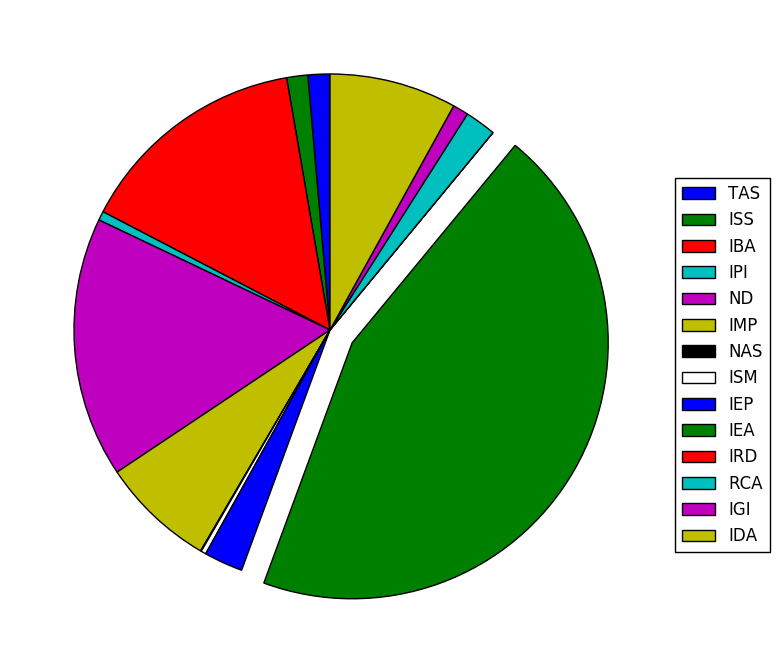

In [45]:
# Declare matplotlib as inline and import pyplot
%matplotlib inline
from matplotlib import pyplot

# Setup the figure
fig = pyplot.figure(1, figsize=(8,8), dpi=96)
ax=fig.add_axes([0.1,0.1,0.8,0.8])

# Extract the lables / percentages
labels = evidence_percent.keys()
fracs = evidence_percent.values()

# Make IEA obvious by "exploding" it
explode = [int('IEA' in x)*0.1 for x in labels]

# Plot the pie chart
patches, texts = ax.pie(list(fracs), explode=explode, startangle=90, labeldistance=1.1) 

# Add 
ax.legend(patches, labels, bbox_to_anchor=(1.2, 0.75), fontsize=12)
pyplot.show()

## Section 4 - GO enrichment or depletion analysis

In this section, the <code>GOEnrichmentStudy()</code> function from the GOATools library will be used to perform GO enrichment analysis.

In [46]:
from goatools import GOEnrichmentStudy

### Exercises 4.1

Perform an enrichment analysis using the list of genes with the _"growth"_ keyword from exercise 3.1.c, and the GO structure from exercise 2.1.

The population is the functions observed in the _Arabidopsis thaliana_ GOA file.

In [47]:
pop = arab_funcs.keys()

Then, we need to create a dictionary of genes with their UniProt ID as a key and their set of GO annotations as the values.

In [48]:
assoc = {}

for x in arab_funcs:
    if x not in assoc:
        assoc[x] = set()
    assoc[x].add(str(arab_funcs[x]['GO_ID']))

Now, the study set here is those genes with the _"growth"_ keyword, found previously.

In [49]:
study = growth_dict.keys()

#### Question 4.1.a.
Which GO term is most significantly enriched or depleted? Does this make sense?

#### Answer 4.1.a.

Possible methods for the GOEnrichmentStudy are:

In [50]:
methods = ["bonferroni", "sidak", "holm", "fdr"]

It is possible to run on all methods, or just a subset.

In [51]:
g = GOEnrichmentStudy(pop, assoc, go,
                         propagate_counts=True,
                         alpha=0.05,
                         methods=methods)
g_res = g.run_study(study)

Propagating term counts to parents ..


25,006 out of 25,006 population items found in association
Calculating uncorrected p-values using Fisher's exact test
    12 out of     12 study items found in association
Running multitest correction: local bonferroni
Running multitest correction: local sidak
Running multitest correction: local holm
Running multitest correction: local fdr


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.000479884827652
Sample 10 / 500: p-value 0.00191827300567
Sample 20 / 500: p-value 0.000959558548242
Sample 30 / 500: p-value 0.00191827300567
Sample 40 / 500: p-value 0.00478935858212
Sample 50 / 500: p-value 0.000479884827652
Sample 60 / 500: p-value 0.00335476349843
Sample 70 / 500: p-value 0.000479884827652
Sample 80 / 500: p-value 0.00239731391136
Sample 90 / 500: p-value 0.000479884827652
Sample 100 / 500: p-value 0.000479884827652
Sample 110 / 500: p-value 6.81721363413e-05
Sample 120 / 500: p-value 0.000959558548242
Sample 130 / 500: p-value 0.0125982581122
Sample 140 / 500: p-value 0.000479884827652
Sample 150 / 500: p-value 0.000959558548242
Sample 160 / 500: p-value 0.000959558548242
Sample 170 / 500: p-value 0.00191827300567
Sample 180 / 500: p-value 0.00431137068147
Sample 190 / 500: p-value 0.000479884827652
Sample 200 / 500: p-value 0.00143902124611
Sample 210 / 

4,851 GO terms are associated with 12 of 12 study items in a population of 25,006


In [52]:
g.print_summary(g_res, min_ratio=None, pval=0.01)

# Generated by GOATOOLS v0.6.5 (2016-09-20)
# min_ratio=None pval=0.01
GO	NS	enrichment	name	ratio_in_study	ratio_in_pop	p_uncorrected	depth	study_count	p_bonferroni	p_sidak	p_holm	p_fdr
GO:0048869	BP	e	cellular developmental process	6/12	124/25006	1.19e-11	n.a.	6	5.76e-08	5.61e-08	5.76e-08	0
GO:0030154	BP	e	cell differentiation	6/12	64/25006	7.31e-11	n.a.	6	3.55e-07	3.46e-07	3.55e-07	0
GO:0044767	BP	e	single-organism developmental process	7/12	460/25006	4.98e-10	n.a.	7	2.42e-06	2.36e-06	2.42e-06	0
GO:0032502	BP	e	developmental process	7/12	662/25006	6.23e-09	n.a.	7	3.02e-05	2.95e-05	3.02e-05	0
GO:0044763	BP	e	single-organism cellular process	6/12	1189/25006	8.23e-06	n.a.	6	0.0399	0.0389	0.0399	0
GO:0044699	BP	e	single-organism process	7/12	2966/25006	0.000151	n.a.	7	0.732	0.713	0.731	0.022
GO:2000012	BP	e	regulation of auxin polar transport	1/12	10/25006	0.00479	n.a.	1	1	1	1	0.886
GO:0009987	BP	e	cellular process	6/12	3882/25006	0.00552	n.a.	6	1	1	1	0.926
GO:0048527	BP	e	lateral root 

We can see that the most significant term is <code>GO:0030154</code> (cell differentiation). It makes sense that this would be associated with proteins having the keyword _"growth"_ in their name.

#### Question 4.1.b.
How many terms are enriched, when using the Bonferroni corrected method and a p-value $\le$ 0.01?

#### Answer 4.1.b.

Perform the GO Enrichment study using the Bonferroni corrected method.

In [53]:
g_bonferroni = GOEnrichmentStudy(pop, assoc, go,
                                 propagate_counts=True,
                                 alpha=0.01,
                                 methods=['bonferroni'])
g_bonferroni_res = g_bonferroni.run_study(study)

Propagating term counts to parents ..


25,006 out of 25,006 population items found in association
Calculating uncorrected p-values using Fisher's exact test
    12 out of     12 study items found in association
Running multitest correction: local bonferroni
4,851 GO terms are associated with 12 of 12 study items in a population of 25,006


In [54]:
s_bonferroni = []
for x in g_bonferroni_res:
    if x.p_bonferroni <= 0.01:
        s_bonferroni.append((x.goterm.id, x.p_bonferroni))

In [55]:
print(s_bonferroni)

[('GO:0048869', 5.7562065363694964e-08), ('GO:0030154', 3.5474662227050526e-07), ('GO:0044767', 2.4171601369634353e-06), ('GO:0032502', 3.0232042562882653e-05)]


#### Question 4.1.c.
How many terms are enriched with false discovery rate (a.k.a. q-value) $\le$ 0.01?

#### Answer 4.1.c.

In [56]:
g_fdr = GOEnrichmentStudy(pop, assoc, go,
                          propagate_counts=True,
                          alpha=0.05,
                          methods=['fdr'])
g_fdr_res = g_fdr.run_study(study)

Propagating term counts to parents ..


25,006 out of 25,006 population items found in association
Calculating uncorrected p-values using Fisher's exact test
    12 out of     12 study items found in association
Running multitest correction: local fdr


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.00143902124611
Sample 10 / 500: p-value 0.000959558548242
Sample 20 / 500: p-value 0.000959558548242
Sample 30 / 500: p-value 0.000479884827652
Sample 40 / 500: p-value 0.00191827300567
Sample 50 / 500: p-value 0.0133572526589
Sample 60 / 500: p-value 0.000959558548242
Sample 70 / 500: p-value 0.000959558548242
Sample 80 / 500: p-value 0.000479884827652
Sample 90 / 500: p-value 0.000959558548242
Sample 100 / 500: p-value 0.000479884827652
Sample 110 / 500: p-value 0.000479884827652
Sample 120 / 500: p-value 0.000479884827652
Sample 130 / 500: p-value 0.00191827300567
Sample 140 / 500: p-value 0.000959558548242
Sample 150 / 500: p-value 0.000479884827652
Sample 160 / 500: p-value 0.000959558548242
Sample 170 / 500: p-value 0.000959558548242
Sample 180 / 500: p-value 0.000479884827652
Sample 190 / 500: p-value 0.000479884827652
Sample 200 / 500: p-value 0.000479884827652
Sample 2

4,851 GO terms are associated with 12 of 12 study items in a population of 25,006


In [57]:
s_fdr = []
for x in g_fdr_res:
    if x.p_fdr <= 0.01:
        s_fdr.append((x.goterm.id, x.p_fdr))

In [58]:
print(s_fdr)

[('GO:0048869', 0.0), ('GO:0030154', 0.0), ('GO:0044767', 0.0), ('GO:0032502', 0.0), ('GO:0044763', 0.002)]


## Section 5 - Computing basic semantic similarities between GO terms

In this section we look at how to compute semantic similarity between GO terms.

In [59]:
from collections import Counter
class TermCounts():
    '''
        TermCounts counts the term counts for each 
    '''
    def __init__(self, go, annots):
        '''
            Initialise the counts and  
        '''
        # Backup
        self._go = go
        
        # Initialise the counters
        self._counts = Counter()
        self._aspect_counts = Counter()
        
        # Fill the counters...
        self._count_terms(go, annots)
        
    def _count_terms(self, go, annots):
        '''
            Fills in the counts and overall aspect counts.
        '''
        for x in annots:
            # Extract term information
            go_id = annots[x]['GO_ID']
            namespace = go[go_id].namespace

            self._counts[go_id] += 1
            rec = go[go_id]
            parents = rec.get_all_parents()
            for p in parents:
                self._counts[p] += 1
            
            self._aspect_counts[namespace] += 1
            
    def get_count(self, go_id):
        '''
            Returns the count of that GO term observed in the annotations.
        '''
        return self._counts[go_id]
        
    def get_total_count(self, aspect):
        '''
            Gets the total count that's been precomputed.
        '''
        return self._aspect_counts[aspect]
    
    def get_term_freq(self, go_id):
        '''
            Returns the frequency at which a particular GO term has 
            been observed in the annotations.
        '''
        try:
            namespace = self._go[go_id].namespace
            freq = float(self.get_count(go_id)) / float(self.get_total_count(namespace))
        except ZeroDivisionError:
            freq = 0
        
        return freq

#### Question 5.1.a.
<code>GO:0048364</code> (root development) and <code>GO:0044707</code> (single-multicellular organism process) are two GO terms taken from Figure 1. Calculate the semantic similarity between them based on the inverse of the semantic distance (number of branches separating them).

#### Answer 5.1.a.

First we need to write a function that calculates the minimum number of branches connecting two GO terms.

In [60]:
def min_branch_length(go_id1, go_id2, go):
    '''
        Finds the minimum branch length between two terms in the GO DAG.
    '''
    # First get the deepest common ancestor
    dca = deepest_common_ancestor([go_id1, go_id2], go)
    
    # Then get the distance from the DCA to each term
    dca_depth = go[dca].depth
    d1 = go[go_id1].depth - dca_depth
    d2 = go[go_id2].depth - dca_depth
    
    # Return the total distance - i.e., to the deepest common ancestor and back.
    return d1 + d2

In [61]:
go_id3 = 'GO:0048364'
go_id4 = 'GO:0044707'

Now we can calculate the semantic distance and semantic similarity, as so:

In [62]:
def semantic_distance(go_id1, go_id2, go):
    '''
        Finds the semantic distance (minimum number of connecting branches) 
        between two GO terms.
    '''
    return min_branch_length(go_id1, go_id2, go)

def semantic_similarity(go_id1, go_id2, go):
    '''
        Finds the semantic similarity (inverse of the semantic distance) 
        between two GO terms.
    '''
    return 1.0 / float(semantic_distance(go_id1, go_id2, go))

In [63]:
sim = semantic_similarity(go_id3, go_id4, go)
print('The semantic similarity between terms {} and {} is {}.'.format(go_id3, go_id4, sim))

The semantic similarity between terms GO:0048364 and GO:0044707 is 0.25.


#### Question 5.1.b.
Calculate the  the information content (IC) of the GO term <code>GO:0048364</code> (root development), based on the frequency of observation in _Arabidopsis thaliana_.

#### Answer 5.1.b.

First we need to define what the information content is.

In [64]:
import math

def ic(go_id, termcounts):
    '''
        Calculates the information content of a GO term.
    '''
    # Get the observed frequency of the GO term
    freq = termcounts.get_term_freq(go_id)

    # Calculate the information content (i.e., -log("freq of GO term")
    return -1.0 * math.log(freq)

Then we can calculate the information content of the single term, <code>GO:0048364</code>.

In [65]:
# First get the counts of each GO term.
termcounts = TermCounts(go, arab_funcs)

# Calculate the information content
infocontent = ic(go_id, termcounts)

In [66]:
print(infocontent)

6.61909026746


#### Question 5.1.c.
Calculate the Resnik similarity measure between the same two terms as in 5.1.a.

#### Answer 5.1.c.

Recall that Resnik's similarity measure is defined as the information content of the most informative common ancestor. That is, the most specific common parent-term in the GO.

In [67]:
def resnik_sim(go_id1, go_id2, go, termcounts):
    '''
        Computes Resnik's similarity measure.
    '''
    msca = deepest_common_ancestor([go_id1, go_id2], go)
    return ic(msca, termcounts)

Then we can calculate this as follows

In [68]:
sim_r = resnik_sim(go_id3, go_id4, go, termcounts)

In [69]:
print('Resnik similarity score: {}'.format(sim_r))

Resnik similarity score: 1.56855972393
